<a href="https://colab.research.google.com/github/hidemet/mldm-credit-card-risk/blob/main/myCopy_ProgettoMLDM_Dumas_Rossini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## 1. Dataset Description

In [13]:
#from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')

# names = [
#     "Account_balance", # 1 Saldo contabile (diviso in quattro fasce)
#     "Duration", # 2 (month)
#     "Credit_history", # 3
#     "Purpose", # 4
#     "Credit_amount", # 5
#     "Saving_accounts", # 6
#     "Employment_length",# 7
#     "Installment_rate", # 8 (% sul reddito disponibile)
#     "Sex_and_Marital_status", # 9 
#     "Guarantor", # 10
#     "Residence_duration", # 11
#     "Most_valuable_asset", # 12
#     "Age", # 13
#     "Concurrent_credits", # 14
#     "Type_apartment", # 15
#     "Existing_Credits_Count", # 16
#     "Job", # 17
#     "Dependents_count", # 18
#     "Telephone", # 19
#     "Foreign_worker", # 20
#     "Credit_risk"  # target
# ]


# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/german.data", sep=" ", header= None, names = names)
# df

In [15]:
names = [
    "Account_balance", # 1 Saldo contabile (diviso in quattro fasce)
    "Duration", # 2 (month)
    "Credit_history", # 3
    "Purpose", # 4
    "Credit_amount", # 5
    "Saving_accounts", # 6
    "Employment_length",# 7
    "Installment_rate", # 8 (% sul reddito disponibile)
    "Sex_and_Marital_status", # 9 
    "Guarantor", # 10
    "Residence_duration", # 11
    "Most_valuable_asset", # 12
    "Age", # 13
    "Concurrent_credits", # 14
    "Type_apartment", # 15
    "Existing_credits_count", # 16
    "Job", # 17
    "Dependents_count", # 18
    "Telephone", # 19
    "Foreign_worker", # 20
    "Credit_risk"  # target
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
data = pd.read_csv(url, sep=" ", header=None, names=names)
data

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


## Data Cleaning

In [16]:
# Variabili categoriche (qualitative)
categorial_cols = [
    "Account_balance",
    "Credit_history",
    "Purpose",
    "Saving_accounts",
    "Employment_length",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset",
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_worker"
]

# Variabili numeriche (quantitative)
numerical_cols = [
    "Duration",
    "Credit_amount",
    "Installment_rate",
    "Residence_duration",
    "Age",
    "Existing_credits_count",
    "Dependents_count"
]

In [17]:
# Verifica che non ci siano valori negativi nelle colonne numeriche
for col in numerical_cols:
    if (data[col] < 0).any():
        print(f"Attenzione: La colonna {col} contiene valori negativi.")

# Verifica che le colonne categoriche contengano solo i valori attesi
expected_values = {
    "Account_balance": ['A11', 'A12', 'A13', 'A14'],
    "Credit_history": ['A30', 'A31', 'A32', 'A33', 'A34'],
    "Purpose": ['A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A410'],
    "Saving_accounts": ['A61', 'A62', 'A63', 'A64', 'A65'],
    "Employment_length": ['A71', 'A72', 'A73', 'A74', 'A75'],
    "Sex_and_Marital_status": ['A91', 'A92', 'A93', 'A94'],
    "Guarantor": ['A101', 'A102', 'A103'],
    "Most_valuable_asset": ['A121', 'A122', 'A123', 'A124'],
    "Concurrent_credits": ['A141', 'A142', 'A143'],
    "Type_apartment": ['A151', 'A152', 'A153'],
    "Job": ['A171', 'A172', 'A173', 'A174'],
    "Telephone": ['A191', 'A192'],
    "Foreign_worker": ['A201', 'A202']
}

for col, valid_values in expected_values.items():
    if not data[col].isin(valid_values).all():
        print(f"Attenzione: La colonna {col} contiene valori non validi.")

# Verifica che non ci siano valori mancanti
missing_values = data.isnull().sum()
if missing_values.any():
    print("Attenzione: Ci sono valori mancanti nelle seguenti colonne:")
    print(missing_values[missing_values > 0])
else:
    print("Non ci sono valori mancanti nel dataset.")

Non ci sono valori mancanti nel dataset.


In [18]:
# Mappatura dei codici con etichette descrittive
label_mapping = {
    "Account_balance": {'A11': 'low', 'A12': 'medium', 'A13': 'high', 'A14': 'no account'},
    "Credit_history": {'A30': 'no credits', 'A31': 'all credits paid', 'A32': 'existing credits paid', 'A33': 'delay in past', 'A34': 'critical account'},
    "Purpose": {'A40': 'car', 'A41': 'furniture/equipment', 'A42': 'radio/TV', 'A43': 'domestic appliances', 'A44': 'repairs', 'A45': 'education', 'A46': 'vacation', 'A47': 'retraining', 'A48': 'business', 'A49': 'others', 'A410': 'others'},
    "Saving_accounts": {'A61': 'little', 'A62': 'moderate', 'A63': 'quite rich', 'A64': 'rich', 'A65': 'no savings account'},
    "Employment_length": {'A71': 'unemployed', 'A72': '< 1 year', 'A73': '1 - 4 years', 'A74': '4 - 7 years', 'A75': '>= 7 years'},
    "Sex_and_Marital_status": {'A91': 'male divorced/separated', 'A92': 'female divorced/separated/married', 'A93': 'male single', 'A94': 'male married/widowed'},
    "Guarantor": {'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'},
    "Most_valuable_asset": {'A121': 'real estate', 'A122': 'life insurance', 'A123': 'car', 'A124': 'no property'},
    "Concurrent_credits": {'A141': 'none', 'A142': 'bank', 'A143': 'stores'},
    "Type_apartment": {'A151': 'own', 'A152': 'for free', 'A153': 'rent'},
    "Job": {'A171': 'unemployed/unskilled - non-resident', 'A172': 'unskilled - resident', 'A173': 'skilled employee/official', 'A174': 'management/self-employed/highly qualified employee'},
    "Telephone": {'A191': 'none', 'A192': 'yes'},
    "Foreign_worker": {'A201': 'yes', 'A202': 'no'},
    "Credit_risk": {1: 'good', 2: 'bad'}
}

data_mapped = data.copy()
for column, mapping in label_mapping.items():
    if column in data_mapped.columns:
        data_mapped[column] = data_mapped[column].map(mapping)

data = data_mapped

data.head(10)

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,low,6,critical account,domestic appliances,1169,no savings account,>= 7 years,4,male single,none,...,real estate,67,stores,for free,2,skilled employee/official,1,yes,yes,good
1,medium,48,existing credits paid,domestic appliances,5951,little,1 - 4 years,2,female divorced/separated/married,none,...,real estate,22,stores,for free,1,skilled employee/official,1,none,yes,bad
2,no account,12,critical account,vacation,2096,little,4 - 7 years,2,male single,none,...,real estate,49,stores,for free,1,unskilled - resident,2,none,yes,good
3,low,42,existing credits paid,radio/TV,7882,little,4 - 7 years,2,male single,guarantor,...,life insurance,45,stores,rent,1,skilled employee/official,2,none,yes,good
4,low,24,delay in past,car,4870,little,1 - 4 years,3,male single,none,...,no property,53,stores,rent,2,skilled employee/official,2,none,yes,bad
5,no account,36,existing credits paid,vacation,9055,no savings account,1 - 4 years,2,male single,none,...,no property,35,stores,rent,1,unskilled - resident,2,yes,yes,good
6,no account,24,existing credits paid,radio/TV,2835,quite rich,>= 7 years,3,male single,none,...,life insurance,53,stores,for free,1,skilled employee/official,1,none,yes,good
7,medium,36,existing credits paid,furniture/equipment,6948,little,1 - 4 years,2,male single,none,...,car,35,stores,own,1,management/self-employed/highly qualified empl...,1,yes,yes,good
8,no account,12,existing credits paid,domestic appliances,3059,rich,4 - 7 years,2,male divorced/separated,none,...,real estate,61,stores,for free,1,unskilled - resident,1,none,yes,good
9,medium,30,critical account,car,5234,little,unemployed,4,male married/widowed,none,...,car,28,stores,for free,2,management/self-employed/highly qualified empl...,1,none,yes,bad


In [19]:
X = data.drop('Credit_risk', axis=1)
y = data['Credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)  # Dovrebbe essere (800, 20)
print("X_test shape:", X_test.shape)   # Dovrebbe essere (200, 20)
print("y_train shape:", y_train.shape)   # Dovrebbe essere (800,)
print("y_test shape:", y_test.shape)    # Dovrebbe essere (200,)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


### 3.2 EDA (Training Set)

In [20]:
# Descrizione statistica del training set
X_train.describe()

,Duration,Credit_amount,Installment_rate,Residence_duration,Age,Existing_credits_count,Dependents_count
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.095000,3360.618750,2.965000,2.846250,35.558750,1.411250,1.143750
std,11.807211,2898.174863,1.122653,1.105277,11.411587,0.578828,0.351056
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1380.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2333.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4154.500000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


#### Istogrammi e Boxplot

In [21]:
# Creare una copia del dataset per evitare di alterare la variabile originale
data_copy = X_train.copy()
data_copy['Credit_risk'] = y_train

# Creare una nuova colonna per le fasce d'età
bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
data_copy['Age_Group'] = pd.cut(data_copy['Age'], bins=bins, labels=labels, right=False)

##### Features numeriche

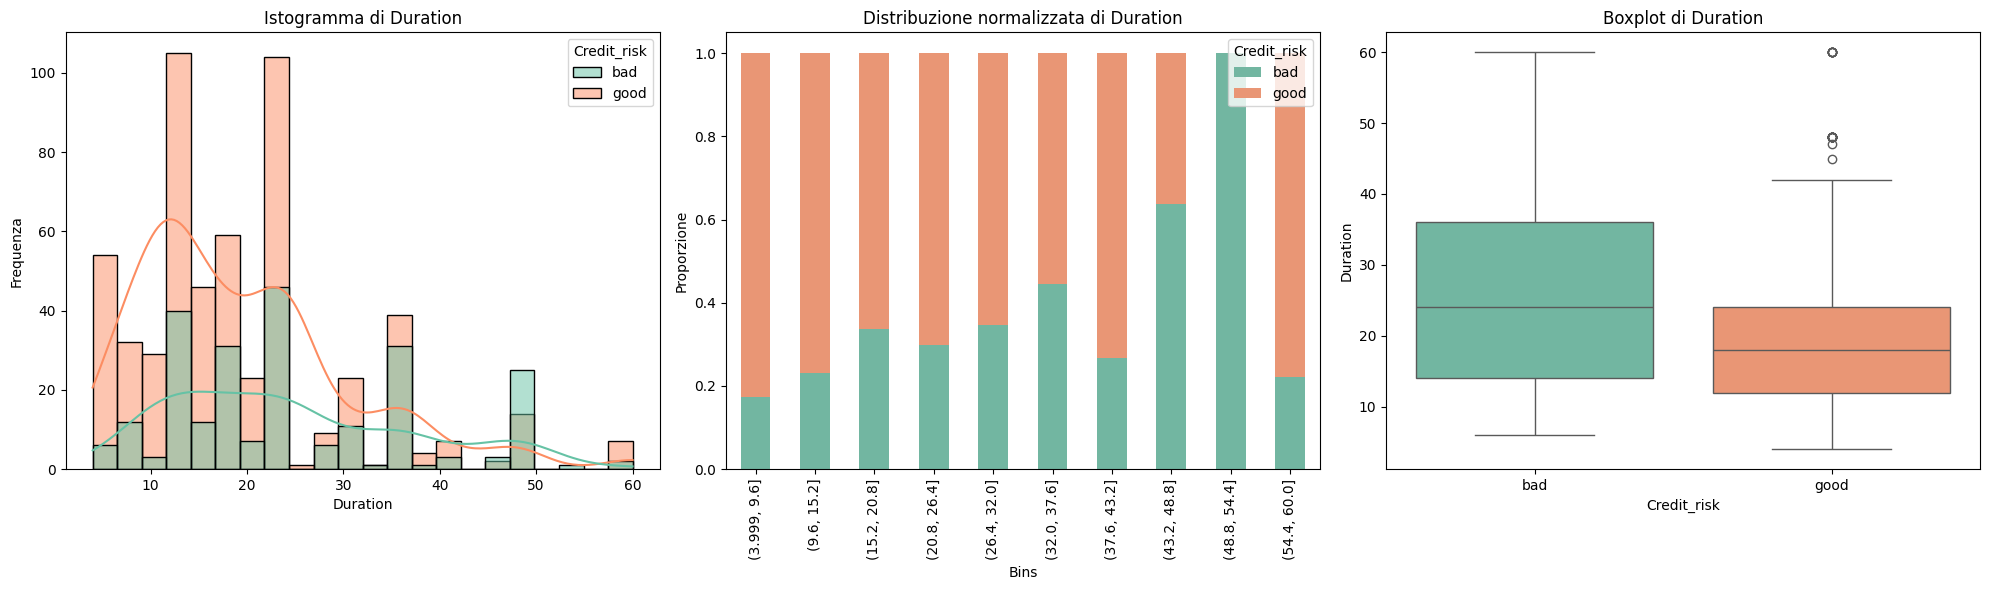

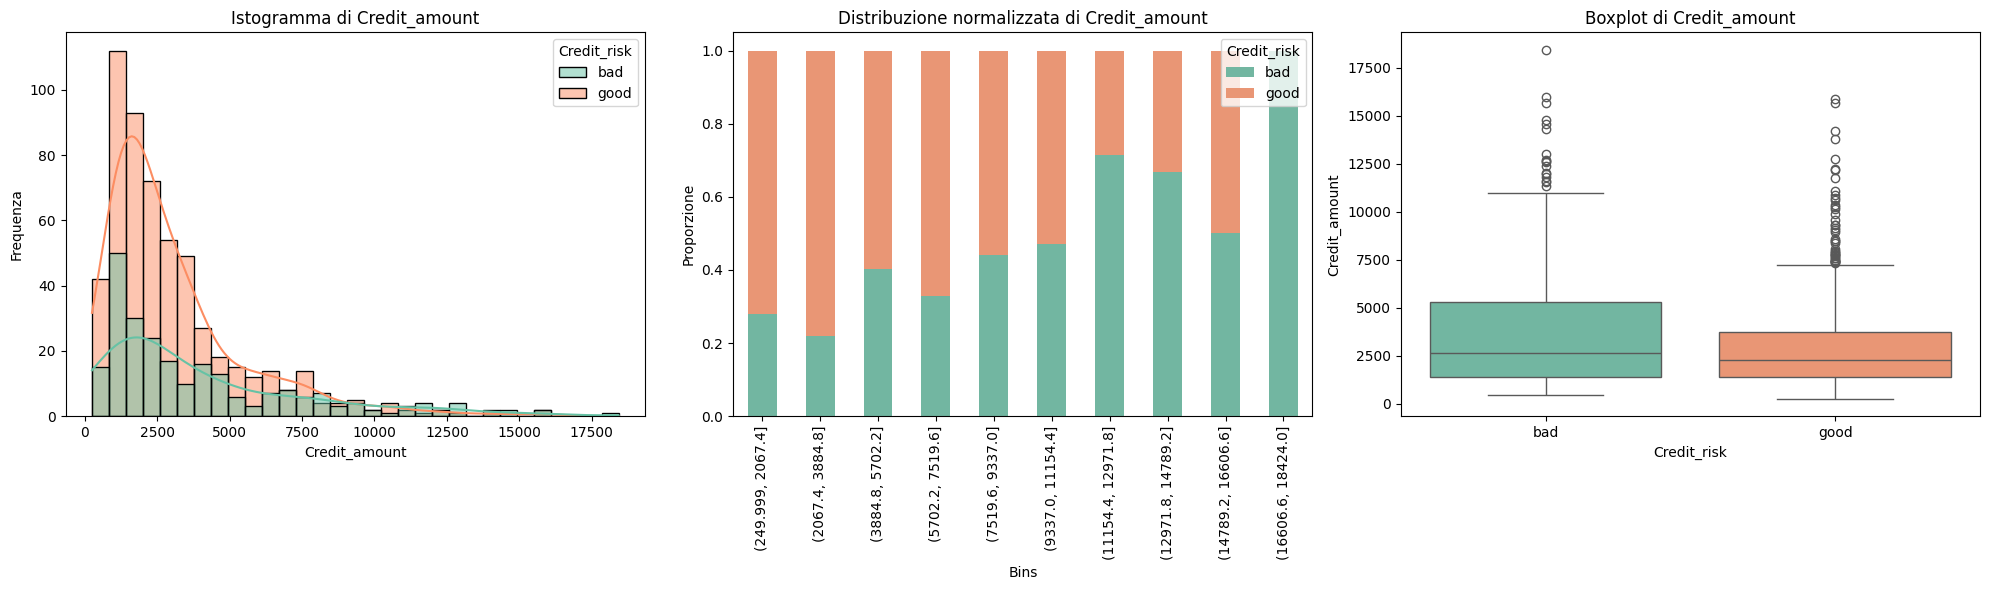

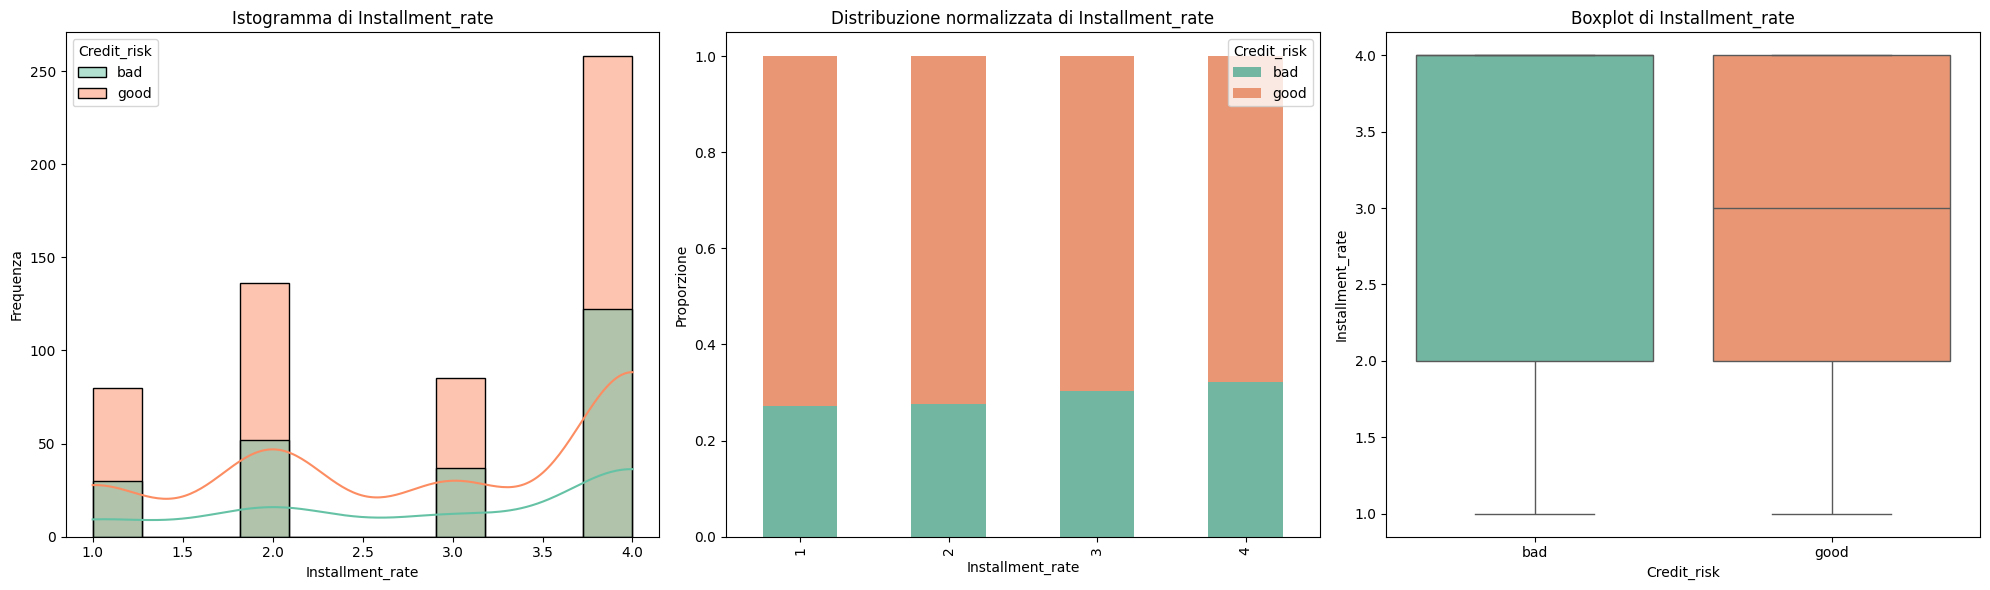

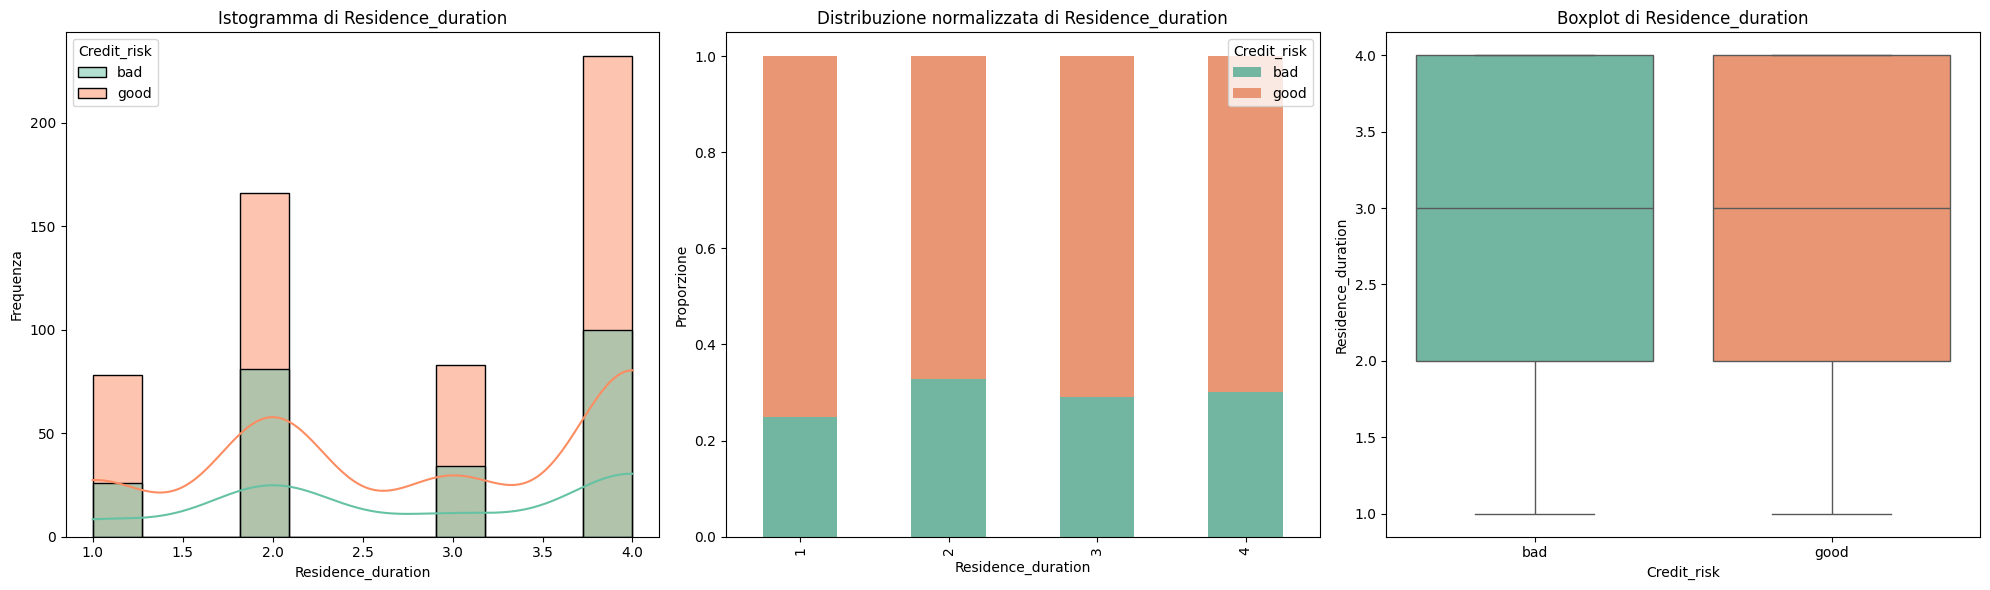

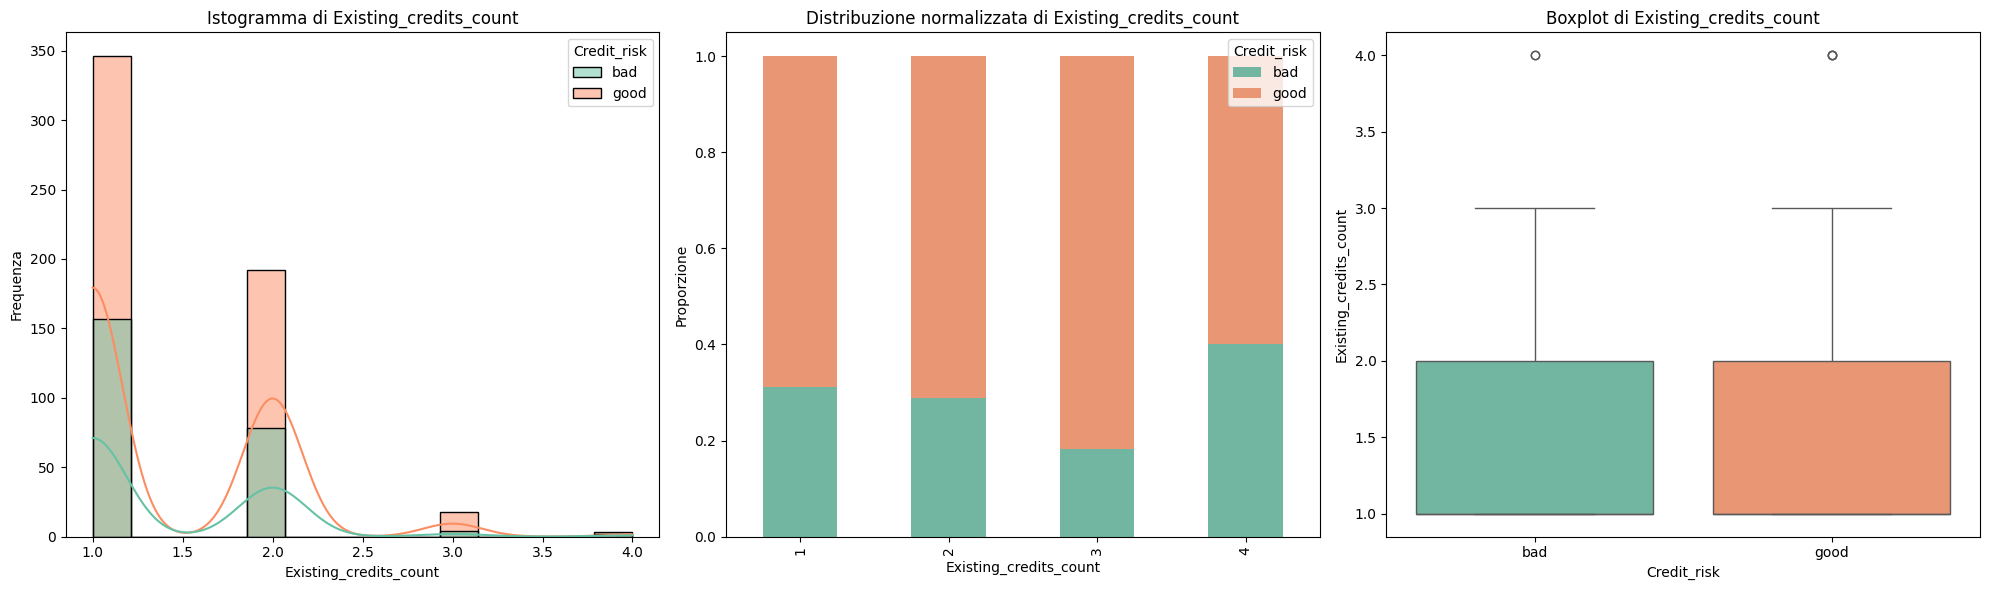

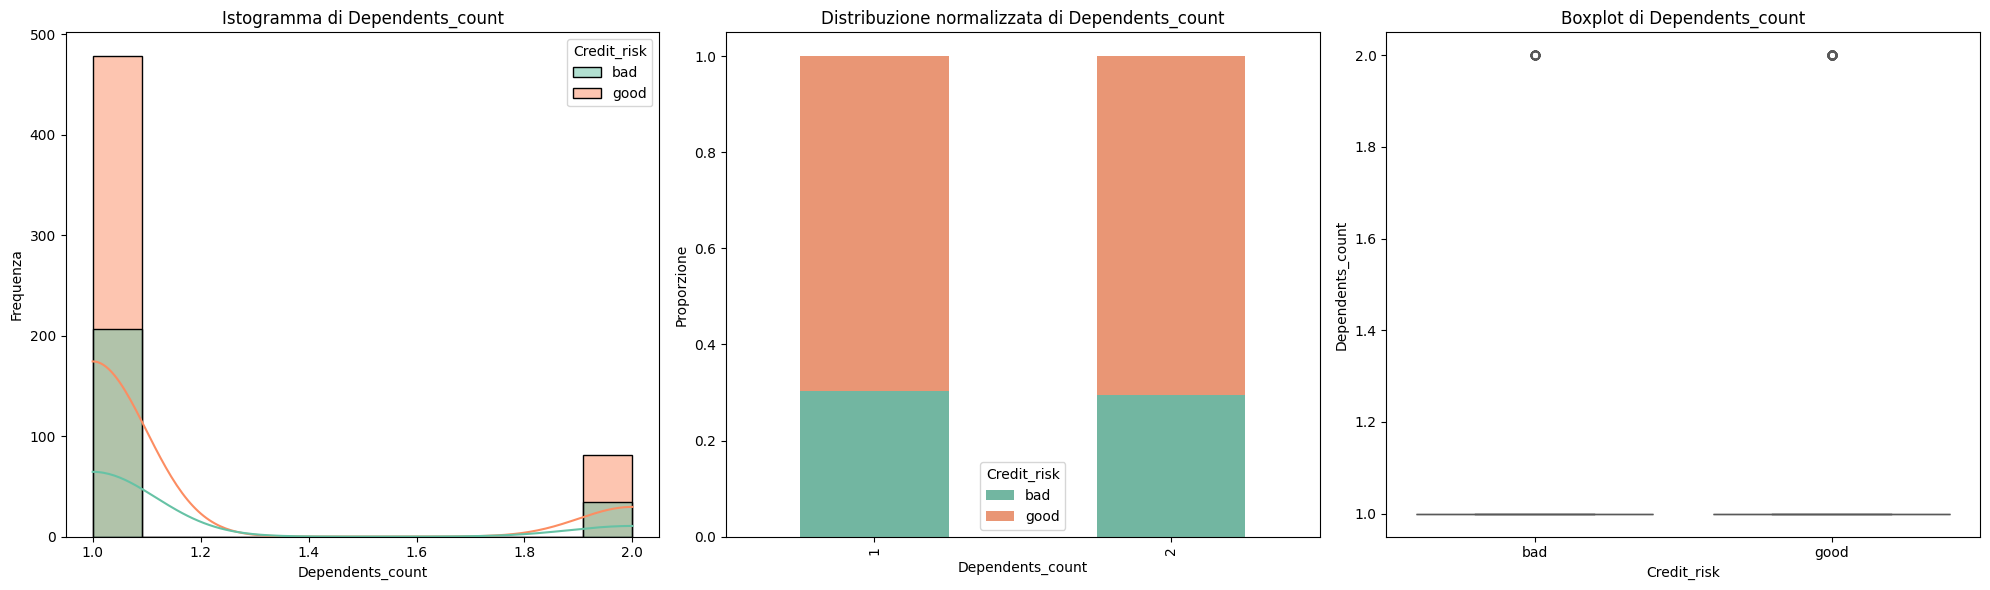

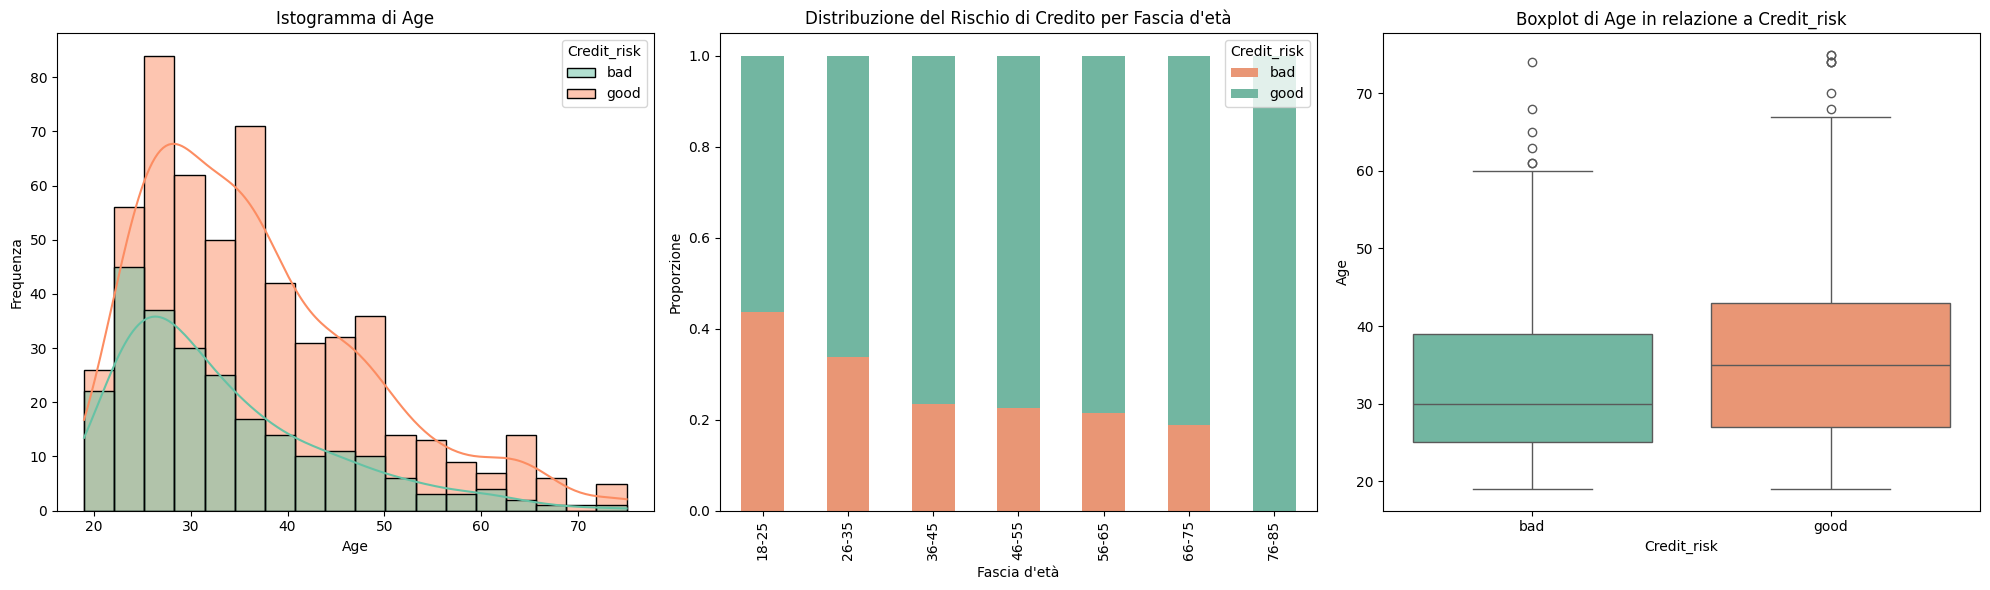

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Soglia per identificare variabili discrete
discrete_threshold = 10

# Il ciclo considera le feature numeriche (esclusa "Age")
for feature in numerical_cols:
    if feature == "Age":
        continue

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # 1. Istogramma con KDE
    sns.histplot(data=data_copy, x=feature, hue='Credit_risk', kde=True,
                 palette="Set2", ax=axes[0])
    axes[0].set_title(f'Istogramma di {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequenza')
    
    # 2. Distribuzione normalizzata
    if data_copy[feature].nunique() <= discrete_threshold:
        # La feature è discreta, si usa direttamente il valore senza binning
        dist = data_copy.groupby(feature)['Credit_risk'].value_counts(normalize=True).unstack().fillna(0)
        dist = dist.reindex(sorted(dist.index))
        dist.plot(kind='bar', stacked=True, color=[ '#72b6a1','#e99675'], ax=axes[1])
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel('Proporzione')
        axes[1].legend(title='Credit_risk', labels=['bad','good'])
        axes[1].set_title(f'Distribuzione normalizzata di {feature}')
    else:
        try:
            bins = np.linspace(data_copy[feature].min(), data_copy[feature].max(), 11)
            data_copy['binned'] = pd.cut(data_copy[feature], bins=bins, include_lowest=True)
            dist = data_copy.groupby('binned', observed=False)['Credit_risk'].value_counts(normalize=True).unstack().fillna(0)
            dist.plot(kind='bar', stacked=True, color=[ '#72b6a1','#e99675'], ax=axes[1])
            axes[1].set_xlabel("Bins")
            axes[1].set_ylabel('Proporzione')
            axes[1].legend(title='Credit_risk',  labels=['bad','good'])
            axes[1].set_title(f'Distribuzione normalizzata di {feature}')
        except Exception as e:
            axes[1].text(0.5, 0.5, f'Errore nel binning: {e}', ha='center')
            axes[1].set_axis_off()
        finally:
            if 'binned' in data_copy.columns:
                data_copy.drop(columns=['binned'], inplace=True)
    
    # 3. Boxplot in relazione a Credit_risk
    sns.boxplot(x='Credit_risk', y=feature, data=data_copy, hue='Credit_risk',
                palette="Set2", dodge=False, ax=axes[2])
    axes[2].set_title(f'Boxplot di {feature}')
    axes[2].set_xlabel('Credit_risk')
    axes[2].set_ylabel(feature)
    axes[2].legend([], [], frameon=False)
    
    plt.tight_layout()
    plt.show()


    feature = 'Age'
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Istogramma con KDE per "Age" suddiviso per Credit_risk
sns.histplot(data=data_copy, x=feature, hue='Credit_risk', kde=True,
             palette="Set2", ax=axes[0])
axes[0].set_title(f'Istogramma di {feature}')
axes[0].set_xlabel(feature)
axes[0].set_ylabel('Frequenza')

# 2. Bar plot con distribuzione normalizzata per fasce d'età (Age_Group)
age_credit_risk = data_copy.groupby('Age_Group', observed=False)['Credit_risk'].value_counts(normalize=True).unstack().fillna(0)
age_credit_risk.plot(kind='bar', stacked=True, color=['#e99675','#72b6a1'], ax=axes[1])
axes[1].set_title("Distribuzione del Rischio di Credito per Fascia d'età")
axes[1].set_xlabel("Fascia d'età")
axes[1].set_ylabel("Proporzione")
axes[1].legend(title="Credit_risk", labels=['bad', 'good'])

# 3. Boxplot per "Age" in relazione al Credit_risk
sns.boxplot(x='Credit_risk', y=feature, data=data_copy, hue='Credit_risk',
            palette="Set2", dodge=False, ax=axes[2])
axes[2].set_title(f'Boxplot di {feature} in relazione a Credit_risk')
axes[2].set_xlabel("Credit_risk")
axes[2].set_ylabel(feature)
axes[2].legend([], [], frameon=False)

plt.tight_layout()
plt.show()

Intepretazione degli istogrammi e dei boxplot delle features numeriche.

- **Duration**:
  - I cattivi pagatori tendono ad avere una mediana leggermente più alta (prestiti più lunghi) rispetto ai buoni pagatori. Questo potrebbe suggerire che la durata del prestito possa essere un fattore di rischio.
- **Credit_amount**:
  - I cattivi pagatori tendono a richiedere importi di prestito leggermente più elevati.
- **Installment_rate**:
  - Non ci sono differenze significative tra i cattivi e i buoni pagatori. Di conseguenza, questa feature potrebbe non essere significativa.
- **Residence_duration**, **Existing_credits_count**, **Dependents_count**:
  - Queste feature sembrano avere un'importanza minore dato che le distribuzioni e i boxplot per buoni e cattivi pagatori sono simili.
  

##### Features categoriali

In [ ]:
# --- Visualizzazione per le feature categoriali (senza boxplot) ---
for feature in categorial_cols:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    
    # 1. Countplot: Frequenza assoluta per ciascuna categoria con separazione per Credit_risk
    sns.countplot(data=data_copy, x=feature, hue='Credit_risk', palette="Set2", ax=axes[0])
    axes[0].set_title(f'Countplot di {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Conteggio')
    
    # 2. Bar plot della distribuzione normalizzata
    dist = data_copy.groupby(feature)['Credit_risk'].value_counts(normalize=True).unstack().fillna(0)
    dist = dist.reindex(sorted(dist.index))
    dist.plot(kind='bar', stacked=True, color=['#e99675','#72b6a1'], ax=axes[1])
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Proporzione')
    axes[1].legend(title='Credit_risk', labels=['bad', 'good'])
    axes[1].set_title(f'Distribuzione normalizzata di {feature}')
    
    plt.tight_layout()
    plt.show()

In [ ]:
counts = data_copy.groupby("Account_balance")["Credit_risk"].value_counts().unstack().fillna(0)
print(counts)
# Visualizzazione dei conteggi con grafico a barre
counts.plot(kind='bar', stacked=True, color=['#72b6a1', '#e99675'], figsize=(10,6))
plt.title("Conteggio Cattivi e Buoni Pagatori per Account_balance")
plt.xlabel("Account_balance")
plt.ylabel("Conteggio")
plt.legend(title="Credit_risk", labels=["Buono", "Cattivo"])
plt.show()

Analisi delle features categoriali:
- **Account_balance**:
  - I cattivi pagatori tendono ad avere un saldo medio più basso rispetto ai buoni pagatori.
- **Credit_history**:
- **Purpose**:
- **Savings_account_balance**:
- **Employment_duration**:
- **Personal**
- **Other_debtors**:
- **Property**:
- **Other_installment_plans**:
- **Housing**:
- **Job**:
- **Telephone**:
- **Foreign_worker**:
- 

Le fasce d'età più giovani hanno un rischio di credito maggiore rispetto a quelle più anziane.

#### Identificazione degli Outliers di `Age` per entrambe le categorie di `Credit_risk`:

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_risk', y='Age', hue='Credit_risk', data=data, palette=["blue","orange"]) 
plt.title('Distribuzione dell\'Età per Rischio di Credito')
plt.show()

La scatola blu per i buoni pagatori è leggermente più in alto rispetto ai cattivi pagatori. Questo suggerisce che, in media, i clienti con un buon rischio di credito tendono ad essere leggermente più anziani rispetto a quelli con rischio cattivo. La differenza non è comunque enorme, ma visibile.

Le altezze delle scatole (IQR) sono simili per entrambe le classi. Questo indica che la variabilità dell'età all'intero del 50% centrale dei clienti è simile per entrambe le classi.

Entrambe le classi presentano degli outlier, che potrebbero significare degli errori nei dati oppure casi particolari. Bisognerà tenere conto che i modelli potrebbero avere difficoltà a generalizzare questi casi particolari.

 **L'età è un fattore, ma non è l'unico:** Il boxplot conferma che l'età ha una certa influenza sul rischio di credito, ma *non è un predittore perfetto*. C'è molta sovrapposizione tra le distribuzioni, il che significa che ci sono persone giovani che sono buoni pagatori e persone anziane che sono cattivi pagatori.

In [ ]:
data.head()

In [ ]:
# Istogrammi per variabili numeriche

for col in numerical_cols:
    plt.figure(figsize=(7, 4))  # Resize as needed
    X_train[col].hist(bins=30, edgecolor='black') # Utilizzo direttamente hist di pandas
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()


In [ ]:
# Grafici a barre per variabili categoriche
for col in categorial_cols:
    plt.figure(figsize=(6, 3))
    X_train[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
y_train.describe()

In [ ]:
# Calcola la frequenza e la percentuale per ogni classe
frequency = y_train.value_counts()
percentage = y_train.value_counts(normalize=True) * 100

# Crea un DataFrame per visualizzare i risultati
freq_percent_df = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})

# Plotting
plt.figure(figsize=(7, 6))
sns.countplot(x=y_train, hue=y_train, palette=['blue', 'orange'])
for i, (freq, perc) in enumerate(zip(freq_percent_df['Frequency'], freq_percent_df['Percentage'])):
    plt.text(i, freq + 5, f'{perc:.2f}%', ha='center', va='bottom')
plt.title('Distribuzione della variabile target (Credit Risk)')
plt.xlabel('Credit Risk')
plt.ylabel('Frequenza')
plt.tight_layout()
plt.show()

#### Il dataset è sbilanciato (70% Classe 1, 30% classe 2)
Lo sbilanciamento può portare a modelli che:
- Hanno un'alta accuratezza complessiva, ma performance scarse sulla classe minoritaria (classe 2 "cattivo pagatore").
- Tendono a predire sempre la classe maggioritaria (classe 1 "buon pagatore").

Ci sono molti dati etichettati come "good credit" (classe 1) e pochi valori etichettati come "bad credit" (classe 2). Questo squilibrio può influenzare la capacità del modello di apprendere i "bad credit".

##### Tecniche di bilanciamento dei dati
1. **Oversampling**: duplicare i record della classe minoritaria.
2. **Undersampling**: eliminare i record della classe maggioritaria.
3. **Pesatura delle classi**: assegnare pesi maggiori alla classe minoritaria.
4. **Metriche di valutazione**: utilizzare metriche come la matrice di confusione, la curva ROC-AUC e la curva di precisione-recall.

##### 1. Oversampling
- Aumentiamo il numero di record della classe minoritaria per bilanciare il dataset.
  - Oversampling semplice: si duplicano i record esistenti della classe minoritaria in modo casuale.
  - SMOTE (Synthetic Minority Over-sampling Technique): si creano nuovi record sintetici della classe minoritaria.

- Vantaggi
  - Non si perdono dati.
  - Non si introduce bias nei dati.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - l'oversampling semplice può portare a overfitting.
  - SMOTE può creare record sintetici che non sono realistici.

##### 2. Undersampling
- Eliminiamo i record della classe maggioritaria per bilanciare il dataset.
- Vantaggi
  - Si riduce il tempo di addestramento.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Perdita di dati.
  - Rischio di *underfitting* (il modello non impara abbastanza dalla classe maggioritaria).
  - Se si rimuovono troppi record in maniera randomica, si può perdere informazione utili per l'addestramento.

##### 3. Pesatura delle classi
- Assegnamo pesi maggiori alla classe minoritaria.
- Molti algoritmi di Scikit-learn (es. LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier) hanno un parametro class_weight. Puoi impostarlo a:
-   "balanced": I pesi vengono calcolati automaticamente in modo inversamente proporzionale alla frequenza delle classi.
- Un dizionario: Puoi specificare manualmente i pesi per ogni classe (es. {0: 1, 1: 2} darebbe peso doppio alla classe 1).

- Vantaggi
  - Non si perdono dati.
  - Non si modifica il dataset.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Non sempre efficace quanto il *resampling*.

##### 4. Metriche di valutazione

- **Matrice di confusione**: mostra il numero di veri positivi, falsi positivi, veri negativi e falsi negativi.
- **Curva ROC-AUC**: mostra il tasso di veri positivi rispetto al tasso di falsi positivi.
- **Curva di precisione-recall**: mostra la precisione rispetto al richiamo.
- **F1-score**: media armonica tra precisione e richiamo.
- **Recall**: tasso di veri positivi.
- **Precisione**: tasso di veri positivi rispetto al numero totale di positivi predetti.
- **Accuratezza**: tasso di predizioni corrette rispetto al numero totale di predizioni.
- **Specificità**: tasso di veri negativi rispetto al numero totale di negativi.
- **Sensibilità**: sinonimo di *recall*.


--------------------------

## 2. Analisi Descrittiva

In [ ]:
display(X_train.describe())
# Dovremmo osservando le statistiche riuscire ad individuare dei possibili outlier o variaili che hanno una distribuzione molto asimmetrica.

In [ ]:
numerical_cols = [
    "Credit_Duration_Month",
    "Credit_Amount",
    "Installment_Rate",
    "Residence_Length",
    "Age",
    "Existing_Credits_Count",
    "Dependents_Count"
]

# Statistiche di base
print(df[numerical_cols].describe())

# Skew (asimmetria)
print("Skew delle variabili numeriche:")
print(df[numerical_cols].skew())

# Boxplot per individuare outlier
for col in numerical_cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot di {col}")
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data=X_train, x=col, kde=True)
    plt.title(f"Distribuzione di {col}")
    plt.show()

In [ ]:
import seaborn as sns

categorical_cols = [
    "Existing_Account_Status",
    "Credit_History",
    "Credit_Purpose",
    "Savings_Account_Status",
    "Employment_Length",
    "Personal_Status_Sex",
    "Other_Debtors_Guarantors",
    "Property_Type",
    "Other_Installment_Plans",
    "Housing_Type",
    "Job_Type",
    "Telephone",
    "Foreign_Worker"
]

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribuzione di {col}")
    plt.xticks(rotation=45)
    plt.show()

`count`: Mostra il numero di non `missing values`, quindi se risulta 800 significa che non ci sono `missing values`.




In [ ]:
"""
X_train.hist(figsize = (12, 10), bins=20):
  param:
    figsize(width = 12,height = 10)
    bins = 20 : specifica il numero di intervalli da usare per ogni istogramma.
"""
X_train.hist(figsize=(12, 10), bins=20)
plt.suptitle("Istogrammi degli attributi (Training Set)")
plt.show()

In [ ]:
# Lista delle colonne numeriche continue (da analisi precedente)
continuous_cols = ['Age', 'Credit_Amount']

# Lista delle colonne numeriche discrete/categoriche (da analisi precedente)
discrete_cols = ['Credit_Duration_Month', 'Existing_Credits_Count', 'Dependents_Count', 'Installment_Rate', 'Residence_Length']

In [ ]:
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(X_train[col], bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.grid(axis='y', alpha=0.75)  # Griglia solo sull'asse y
    plt.show()


In [ ]:
for col in discrete_cols:
    plt.figure(figsize=(12, 4))
    # Calcola i valori unici e il loro conteggio.  Usa 'dropna=False' per includere ANCHE eventuali NaN
    counts = X_train[col].value_counts(dropna=False).sort_index()
    #Usa bar, e passa i conteggi direttamente.
    plt.bar(counts.index, counts.values, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequenza", fontsize=12)
    plt.title(f"{col}", fontsize=14)
    plt.xticks(counts.index) #Mostra tutti i valori discreti sull'asse x.
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [ ]:
# --- Istogrammi ---
# Imposta lo stile degli istogrammi (opzionale, ma rende i grafici più belli)
sns.set_style("whitegrid")

# Crea gli istogrammi per tutte le colonne numeriche
plt.figure(figsize=(15, 12))  # Imposta le dimensioni della figura
for i, column in enumerate(X_train.columns):
    plt.subplot(4, 5, i + 1)  # Crea un subplot per ogni colonna (4 righe, 5 colonne)
    sns.histplot(X_train[column], kde=False)  # Crea l'istogramma
    plt.title(column)  # Imposta il titolo
    plt.tight_layout()  # Evita sovrapposizioni
plt.show()

In [ ]:
# Lista delle colonne categoriche (da analisi precedente)
categorical_cols = ['Status_Checking_Acc', 'Credit_History', 'Purpose',
                   'Savings_Acc', 'Years_Employed', 'Status_Sex',
                   'Other_Debtors_Guarantors', 'Property_Type',
                   'Other_Installment_Plans', 'Housing_Type', 'Job_Type',
                   'Telephone', 'Foreign_Worker']

# Analisi delle variabili categoriche
for col in categorical_cols:
    print(f"\n--- Colonna: {col} ---")

    # Conteggio dei valori distinti (incluse le modalità)
    print("\nConteggio valori distinti:")
    print(df[col].value_counts(dropna=False))

    # Visualizzazione con grafico a barre (solo se ci sono meno di 20 categorie)
    if df[col].nunique() <= 20:
        plt.figure(figsize=(8, 4))
        df[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
        plt.title(f"Distribuzione di {col}")
        plt.xlabel("Categoria")
        plt.ylabel("Frequenza")
        plt.xticks(rotation=45, ha="right")  # Ruota le etichette per leggibilità
        plt.grid(axis='y', alpha=0.75)
        plt.show()
    else:
        print("\n(Troppe categorie per visualizzare il grafico a barre)")

In [ ]:
print("Valori mancanti per colonna (Training Set):")
print(X_train.isnull().sum())

Non ci sono valori mancanti nelle colonne. In tal caso avremmo dovuto decidere se eliminare le righe o colonne ecc.

In [ ]:
print("Distribuzione della variabile target (Training Set):")
print(y_train.value_counts()) # Conteggio
print(y_train.value_counts(normalize=True))

Abbiamo un problema: La **classe 1** (69.9%) è molto più frequente della **classe 2**. Potrebbe succedere che il modello impari bene (alta accuratezza) la classe 1,al contrario sbagliando di frequente (basa accuratezza) l'altra classe.